## Лабораторная работа 6. Обучение моделей

In [ ]:
import pandas as pd

train_df = pd.read_csv('./train_dataset.csv')
val_df = pd.read_csv('./val_dataset.csv')
test_df = pd.read_csv('./test_dataset.csv')

In [ ]:
X_train_BoW = pd.read_csv('./X_train_vec_BoW.csv')
X_val_BoW = pd.read_csv('./X_val_vec_BoW.csv')
X_test_BoW = pd.read_csv('./X_test_vec_BoW.csv')

X_train_BoW['label'] = train_df['popularity']
X_val_BoW['label'] = val_df['popularity']
X_test_BoW['label'] = test_df['popularity']


X_train_TF_IDF = pd.read_csv('./X_train_vec_TF_IDF.csv')
X_val_TF_IDF = pd.read_csv('./X_val_vec_TF_IDF.csv')
X_test_TF_IDF = pd.read_csv('./X_test_vec_TF_IDF.csv')

X_train_TF_IDF['label'] = train_df['popularity']
X_val_TF_IDF['label'] = val_df['popularity']
X_test_TF_IDF['label'] = test_df['popularity']


X_train_W2V = pd.read_csv('./X_train_vec_W2V.csv')
X_val_W2V = pd.read_csv('./X_val_vec_W2V.csv')
X_test_W2V = pd.read_csv('./X_test_vec_W2V.csv')

X_train_W2V['label'] = train_df['popularity']
X_val_W2V['label'] = val_df['popularity']
X_test_W2V['label'] = test_df['popularity']

Задача: определить, чем отличаются популярные посты, чтобы писать в канале только такие и получать больше просмотров/реакций/комментариев

Возьмем в качестве основной метрики accuracy, так как классы сбалансированные (примерно 50/50). Но и остальные метрики тоже будем рассчитывать, ибо комплексную оценку и сравнение никто не отменял.

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

def train_model(df_train, df_val, df_test, name_dataset, classifier=None):
    X_train = df_train.drop(columns='label').values
    y_train = df_train['label'].values

    X_val = df_val.drop(columns='label').values
    y_val = df_val['label'].values

    X_test = df_test.drop(columns='label').values
    y_test = df_test['label'].values

    clf_pretrained = classifier.fit(X_train, y_train)

    model_path = f'/content/drive/MyDrive/анализ соц медиа на python/Lab_5/{type(classifier).__name__}_for_{name_dataset}.joblib'
    joblib.dump(clf_pretrained, model_path)

    y_pred_val = clf_pretrained.predict(X_val)
    y_pred_test = clf_pretrained.predict(X_test)

    def add_metrics(y_true, y_pred, dataset_name):
        results.append({
            'Vectorizer': name_dataset,
            'Model': type(classifier).__name__,
            'Dataset': dataset_name,
            'Accuracy': accuracy_score(y_true, y_pred),
            'Precision': precision_score(y_true, y_pred, average='macro', zero_division=0),
            'Recall': recall_score(y_true, y_pred, average='macro', zero_division=0),
            'F1-score': f1_score(y_true, y_pred, average='macro', zero_division=0)
        })

    add_metrics(y_val, y_pred_val, 'Validation')
    add_metrics(y_test, y_pred_test, 'Test')


### Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_LR = LogisticRegression(
        penalty = 'l2', #{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
        C = 0.2, #float, default=1.0
        class_weight = 'balanced', #dict or ‘balanced’, default=None
        random_state = 42,
        max_iter = 100, #int, default=100
        n_jobs = -1, #int, default=None
)

results = []
train_model(X_train_BoW, X_val_BoW, X_test_BoW, name_dataset='BoW', classifier=clf_LR)
train_model(X_train_TF_IDF, X_val_TF_IDF, X_test_TF_IDF, name_dataset='TF-IDF', classifier=clf_LR)
train_model(X_train_W2V, X_val_W2V, X_test_W2V, name_dataset='Word2Vec', classifier=clf_LR)

### Метод опорных векторов

In [ ]:
from sklearn.svm import LinearSVC

clf_lsvc = LinearSVC(
        penalty = 'l2', #{‘l1’, ‘l2’}, default=’l2’
        C = 0.2, #float, default=1.0
        class_weight = 'balanced', #dict or ‘balanced’, default=None
        random_state = 42,
        max_iter = 2000 #int, default=1000
)

train_model(X_train_BoW, X_val_BoW, X_test_BoW, name_dataset='BoW', classifier=clf_lsvc)
train_model(X_train_TF_IDF, X_val_TF_IDF, X_test_TF_IDF, name_dataset='TF-IDF', classifier=clf_lsvc)
train_model(X_train_W2V, X_val_W2V, X_test_W2V, name_dataset='Word2Vec', classifier=clf_lsvc)

### Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf =  RandomForestClassifier(
        n_estimators = 200, #int, default=100
        criterion = 'gini', #{“gini”, “entropy”, “log_loss”}, default=”gini”
        max_depth = 200, #int, default=None
        class_weight = 'balanced', #dict or ‘balanced’, default=None
        random_state = 42
)

train_model(X_train_BoW, X_val_BoW, X_test_BoW, name_dataset='BoW', classifier=clf_rf)
train_model(X_train_TF_IDF, X_val_TF_IDF, X_test_TF_IDF, name_dataset='TF-IDF', classifier=clf_rf)
train_model(X_train_W2V, X_val_W2V, X_test_W2V, name_dataset='Word2Vec', classifier=clf_rf)

### Метрики

In [ ]:
results_df = pd.DataFrame(results)
results_df

,Vectorizer,Model,Dataset,Accuracy,Precision,Recall,F1-score
0,BoW,LogisticRegression,Validation,0.457888,0.457324,0.457717,0.456539
1,BoW,LogisticRegression,Test,0.513105,0.513189,0.513174,0.512993
2,TF-IDF,LogisticRegression,Validation,0.478055,0.478028,0.478031,0.478019
3,TF-IDF,LogisticRegression,Test,0.502016,0.501969,0.501967,0.501917
4,Word2Vec,LogisticRegression,Validation,0.603047,0.604491,0.603244,0.601934
5,Word2Vec,LogisticRegression,Test,0.580350,0.580938,0.580440,0.579741
6,BoW,LinearSVC,Validation,0.476868,0.476510,0.476706,0.475688
7,BoW,LinearSVC,Test,0.483871,0.483915,0.483928,0.483795
8,TF-IDF,LinearSVC,Validation,0.470937,0.470792,0.470854,0.470609
9,TF-IDF,LinearSVC,Test,0.493952,0.493997,0.494000,0.493900


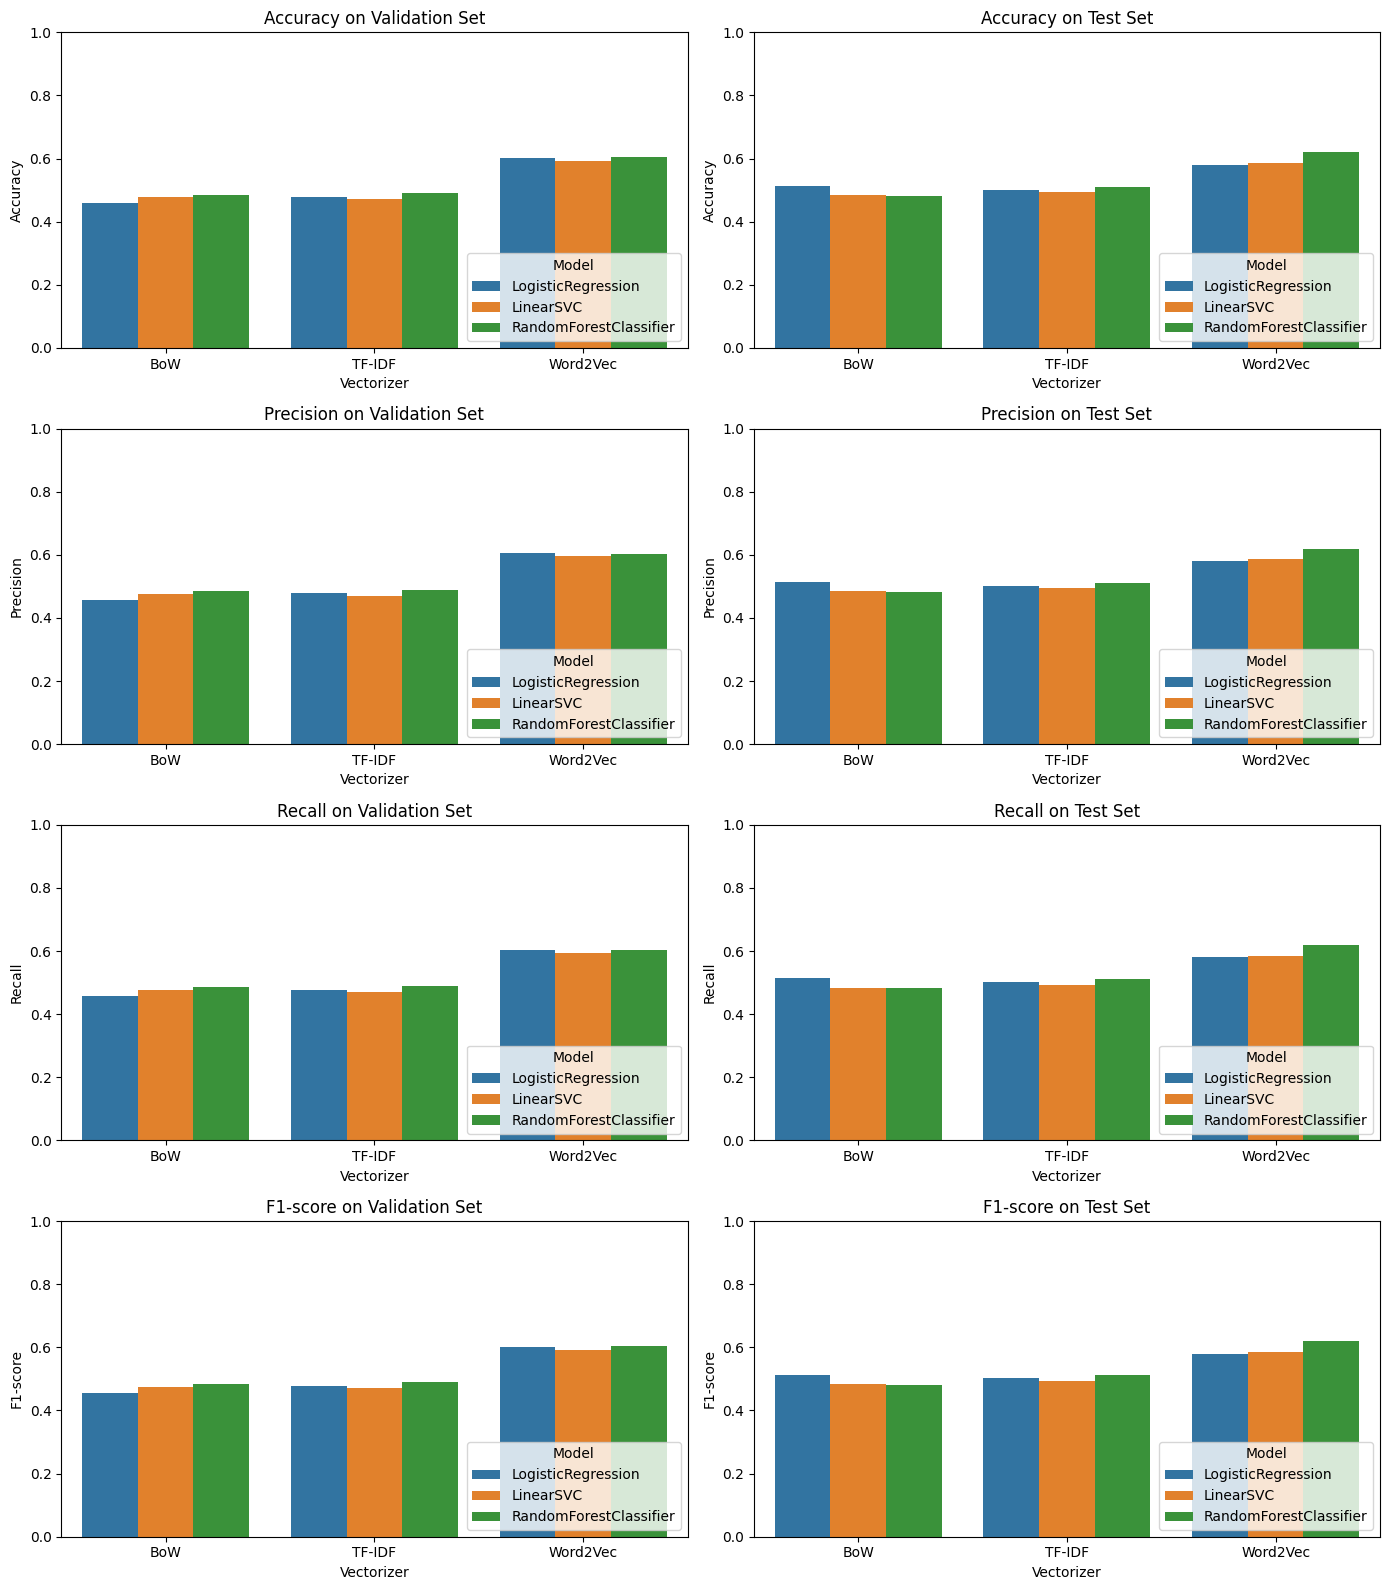

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = results_df

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
datasets = ['Validation', 'Test']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
plt.subplots_adjust(hspace=0.4)

for i, metric in enumerate(metrics):
    for j, dataset in enumerate(datasets):
        ax = axes[i, j]
        sns.barplot(
            x='Vectorizer',
            y=metric,
            hue='Model',
            data=df[df['Dataset'] == dataset],
            errorbar=None,
            ax=ax
        )
        ax.set_title(f'{metric} on {dataset} Set')
        ax.set_ylim(0, 1)
        ax.legend(loc='lower right', title='Model')

plt.tight_layout()
plt.show()